In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df= pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

# Q1 - Do smokers have higher insurance charges than non-smokers

1. Null Hypothesis: There is no significant difference in insurance charges between smokers and non-smokers.

    Alternate Hypothesis: Smokers have higher insurance charges than non-smokers.

    Significance value: .05

2. Hypothesis Test: Since this is numeric data between 2 known groups, I will conduct a 2 Sample T-Test.

3. Assumptions to test: 1) NO significant outliers, 2) normality, 3) equal Variance



In [3]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [4]:
smoker = df.loc[df['smoker']=='yes'].copy()
nonsmoker = df.loc[df['smoker']=='no'].copy()

In [5]:
smoker_charges = smoker['charges']
nonsmoker_charges = nonsmoker['charges']

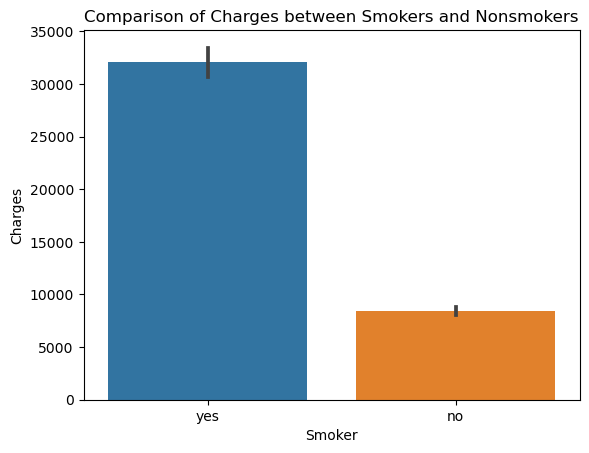

In [6]:
sns.barplot(x='smoker', y='charges', data=df)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Comparison of Charges between Smokers and Nonsmokers')
plt.show()

In [7]:
#Check for Outliers in smokers
zscores = stats.zscore(smoker_charges)
outliers = abs(zscores) > 3
np.sum(outliers)

0


There are no outliers to remove for smoker_charges

In [8]:
#Check for outliers in nonsmokers
zscores = stats.zscore(nonsmoker_charges)
outliers = abs(zscores) > 3
np.sum(outliers)

24

In [9]:
#Remove outliers in nonsmokers
nonsmoker_charges = nonsmoker_charges[(np.abs(stats.zscore(nonsmoker_charges)) <3)]

In [10]:
#Check for Normality in smokers
result_smokers = stats.normaltest(smoker_charges)
result_smokers

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [11]:
#Check for Normality in nonsmokers
result_nonsmokers = stats.normaltest(nonsmoker_charges)
result_nonsmokers

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

Our p-values for both groups are well below 0.05 which means our data is NOT normally distributed. However, our our sample size is large enough to proceed without satisfying this test.

In [12]:
#Check for Equal Variance
result = stats.levene(smoker_charges, nonsmoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Since the pvalue is below .05, we do not have equal variance. So, we will include "equal_var=False" when performing T-test.

In [13]:
#Perform the T-Test
result = stats.ttest_ind(smoker_charges, nonsmoker_charges, equal_var=False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

Our P-value is below .05, so we reject the null hypothesis and accept that there is a significant difference between charges for smokers and nonsmokers.

# Q2 - Are men more likely to smoke than women?

1. Null hypothesis: There is no difference in smoking rates between men and women.
    Alternative hypothesis: Men are more likely to smoke than women.

2. Hypothesis Test: Since this is categorical data between 2 known groups, I will conduct a Chi-Square test.

3. Assumptions to test: 1)There are 2 categorical variables(nominal), 2) The outcomes are independent 

Text(0.5, 1.0, 'Number of Smokers by sex')

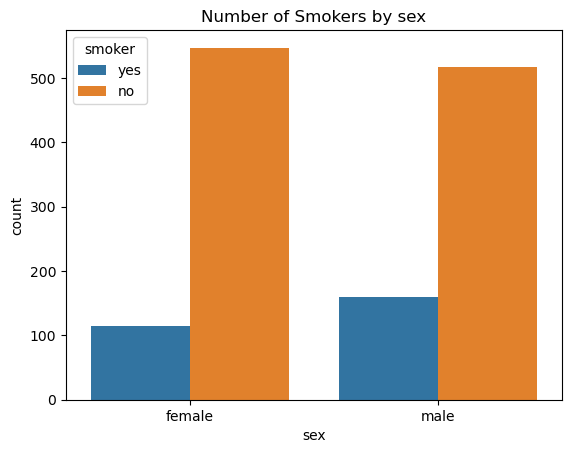

In [14]:
#Visualize men vs. women smokers
ax = sns.countplot(data=df, x='sex', hue='smoker')
ax.set_title('Number of Smokers by sex')

In [15]:
#Calculate the contingency table
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [16]:
#Run chi test and save the output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [17]:
#What is our p value?
print(p)
p < .05

0.006548143503580696


True

The p-value is much less than 0.05, so we have a significant result.

Since our p < .05, we reject the null hypothesis that there is no relationship between a person's Sex and if they are a smoker. This means that we accept the alternate hypothesis and conclude that there is a relationship between a person's sex and whether or not they are a smoker.

# Q3 - Do different regions have different charges, on average?

1. Null hypothesis: There is no difference in average charges between different regions.
    Alternative hypothesis: Different regions have different charges, on average.
    
2. Hypothesis Test: Since this is numeric data comparing more than 2 groups, I will use an ANOVA and/or Tukey test. 

3. Assumptions to Test: 1) No significant outliers, 2) equal variance, 3) normality


In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

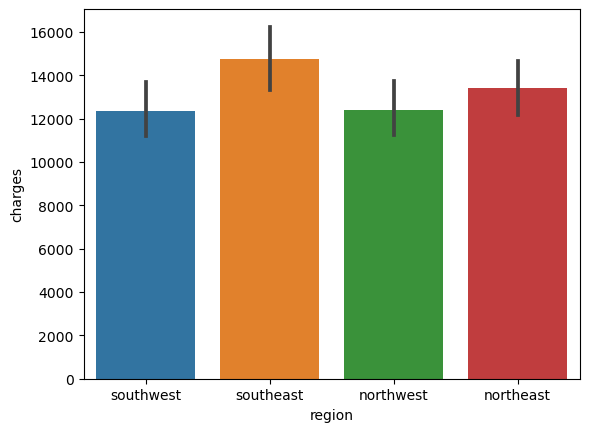

In [19]:
#Visualize the data
sns.barplot(data=df, x='region', y = 'charges');

In [20]:
#Create a dictionary to analyze each group separately
groups = {}

for i in df['region'].unique():
    data=df.loc[df['region']==i, 'charges'].copy()
    groups[i] = data

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [21]:
#Check for normality
norm_results = {}

for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data),
                      'p':p,
                      'test stat':stat}

norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [22]:
#Checking sig with pandas
norm_results_df['sig'] = norm_results_df['p'] < .05
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


We can confirm that neither group has normal distribution, since they all have p < .05. However, we will ignore this because n >= 15 for each group, and we have between 2-9 groups.

In [23]:
#Test for equal variance
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

We did not meet the assumption of equal variance. Because of this ,we will run a non-parametric test Kruskal-Wallis, since this was originally an ANOVA test. 

In [25]:
southwest = df[df['region'] == 'southwest']['charges']
southeast = df[df['region'] == 'southeast']['charges']
northwest = df[df['region'] == 'northwest']['charges']
northeast = df[df['region'] == 'northeast']['charges']

statistic, p_value = stats.kruskal(southwest, southeast, northwest, northeast)

print('Kruskal_wallis stats:', statistic)
print('P-value:', p_value)

Kruskal_wallis stats: 4.734181215658743
P-value: 0.19232908072121002


The p-value is above .05, meaning that we fail to reject the null hypothesis that regions have different charges, on average.